## Data Dictionary

**loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

**term: The number of payments on the loan. Values are in months and can be either 36 or 60.

**int_rate: Interest Rate on the loan

**installment: The monthly payment owed by the borrower if the loan originates.

**grade: LC assigned loan grade

**sub_grade: LC assigned loan subgrade

**emp_title: The job title supplied by the Borrower when applying for the loan.

**emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

**home_ownership: The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER

**annual_inc: The self-reported annual income provided by the borrower during registration.

**verification_status: Indicates if income was verified by LC, not verified, or if the income source was verified

**issue_date: The month which the loan was funded

**loan_status: Current status of the loan

**purpose: A category provided by the borrower for the loan request.

**title: The loan title provided by the borrower

**zip_code: The first 3 numbers of the zip code provided by the borrower in the loan application.

**addr_state: The state provided by the borrower in the loan application

**dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

**earliest_cr_line: The month the borrower's earliest reported credit line was opened

**open_acc: The number of open credit lines in the borrower's credit file.

**pub_rec: Number of derogatory public records

**revol_bal: Total credit revolving balance

**revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

**total_acc: The total number of credit lines currently in the borrower's credit file

**initial_list_status: The initial listing status of the loan. Possible values are – W, F

**application_type: Indicates whether the loan is an individual application or a joint application with two co-borrowers

**mort_acc: Number of mortgage accounts.

**pub_rec_bankruptcies: Number of public record bankruptcies

In [1]:
#bult_in library
import itertools
import warnings
import re
from typing import Union, Optional, Sequence

warnings.filterwarnings("ignore")

#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#pandas setting
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 2_000

#import of packages
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris


#importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn import pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency

In [2]:
df= pd.read_csv("lending_club_loan_two.csv")

print(f"shape of df: {df.shape}\n")

df.head()

shape of df: (396030, 27)



,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


## EXPLORATORY DATA ANALYSIS

In [3]:
#checking for the type of variables
df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

In [4]:
#checking the description of the dataset
df.describe

<bound method NDFrame.describe of         loan_amnt        term  int_rate  installment grade sub_grade  \
0         10000.0   36 months     11.44       329.48     B        B4   
1          8000.0   36 months     11.99       265.68     B        B5   
2         15600.0   36 months     10.49       506.97     B        B3   
3          7200.0   36 months      6.49       220.65     A        A2   
4         24375.0   60 months     17.27       609.33     C        C5   
...           ...         ...       ...          ...   ...       ...   
396025    10000.0   60 months     10.99       217.38     B        B4   
396026    21000.0   36 months     12.29       700.42     C        C1   
396027     5000.0   36 months      9.99       161.32     B        B1   
396028    21000.0   60 months     15.31       503.02     C        C2   
396029     2000.0   36 months     13.61        67.98     C        C2   

                       emp_title emp_length home_ownership  annual_inc  \
0                      Mark

In [5]:
#checking for missing variables
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [6]:
#checking the number of each unique features
df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [7]:
#checking the number of each unique features
df.nunique()

df.loc[df.duplicated()]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


In [8]:
#checking the value count of the target variable
df["loan_status"].value_counts(normalize=True)



Fully Paid     0.803871
Charged Off    0.196129
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='loan_status', ylabel='count'>

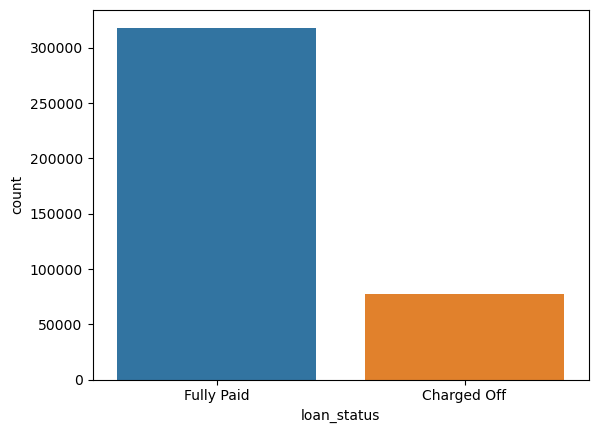

In [9]:
#visualizing the target variable using countplot, where charged off means defaulted
sns.countplot( x = "loan_status", data = df)

<AxesSubplot:xlabel='installment', ylabel='Density'>

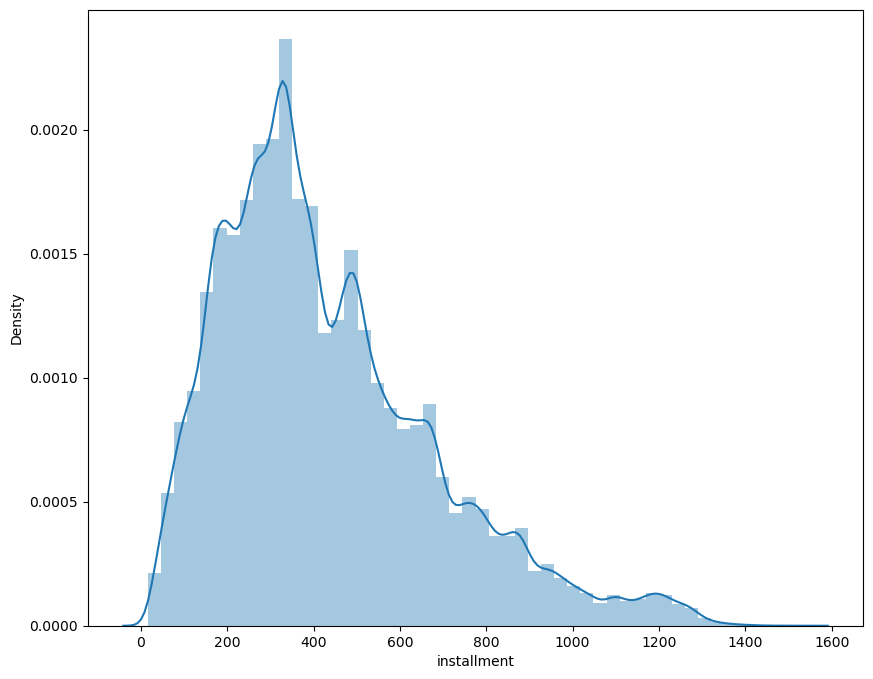

In [10]:
#visualization of the installment payment 
plt.figure(figsize = (10,8))
sns.distplot(df['installment'], bins = 50)

<AxesSubplot:xlabel='int_rate', ylabel='Density'>

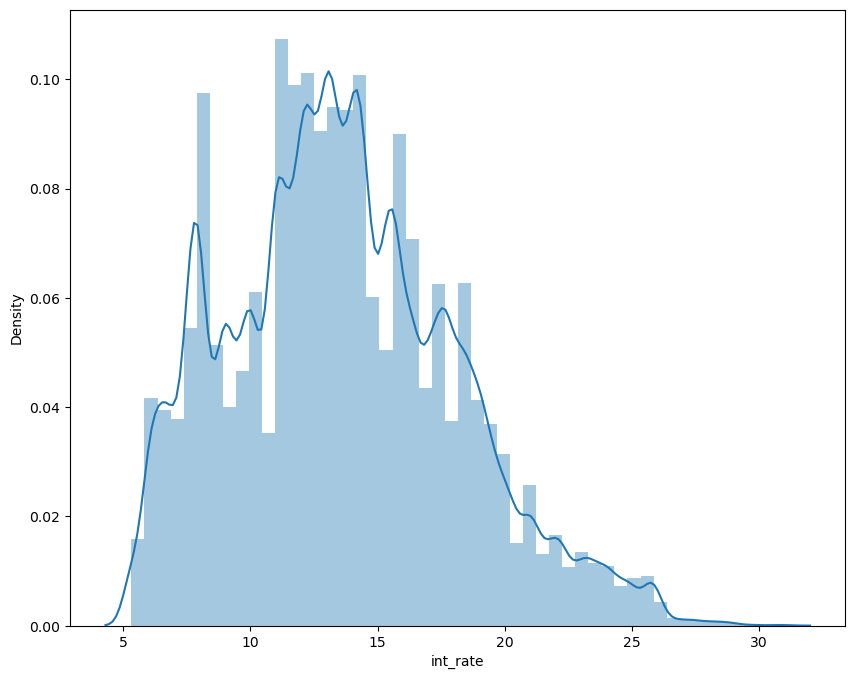

In [11]:
#visualization of the installment payment 
plt.figure(figsize = (10,8))
sns.distplot(df['int_rate'], bins = 50)

<AxesSubplot:xlabel='open_acc', ylabel='Density'>

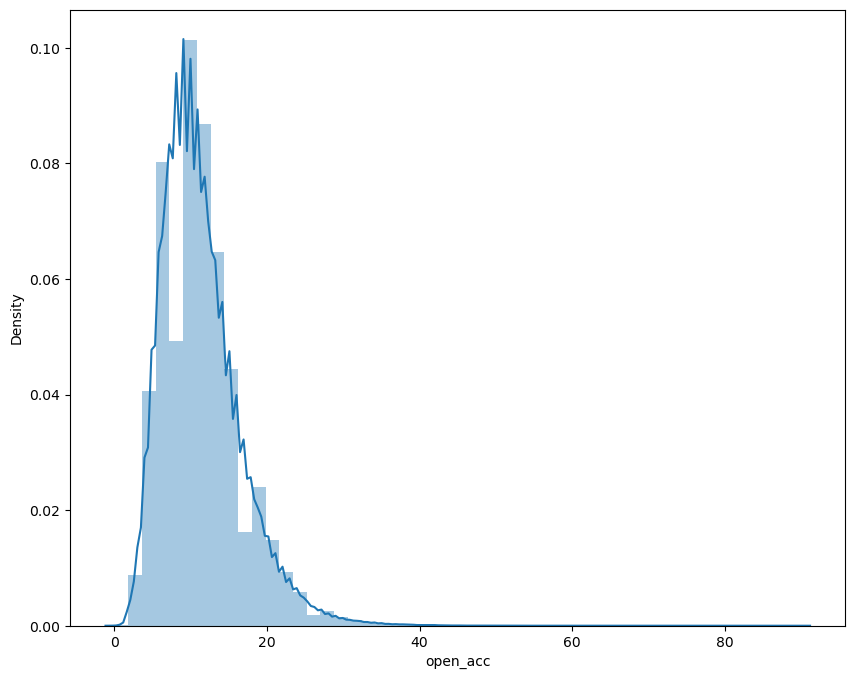

In [12]:
#visualization of the installment payment 
plt.figure(figsize = (10,8))
sns.distplot(df['open_acc'], bins = 50)

<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

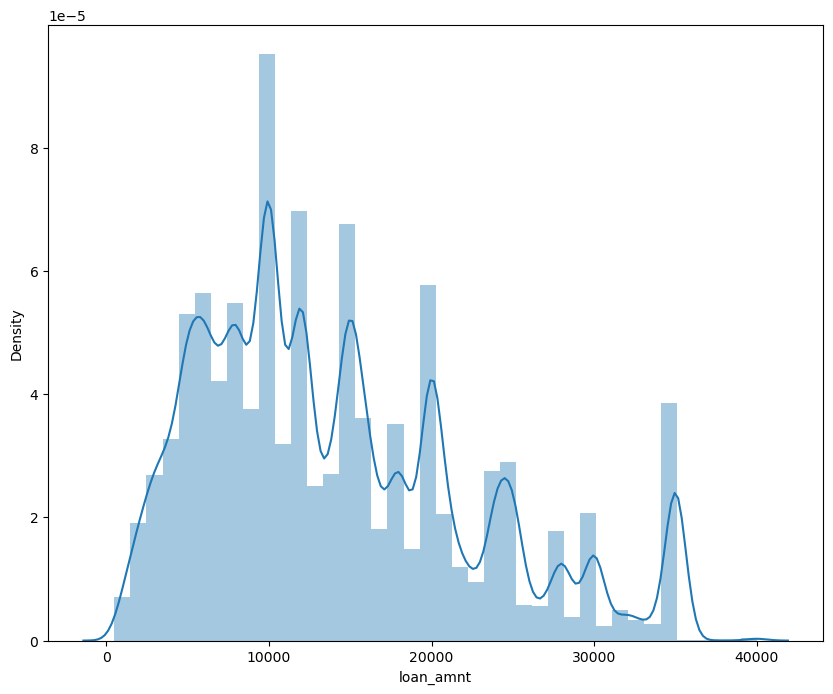

In [13]:
#visualization of the loan_amnt 
plt.figure(figsize = (10,8))
sns.distplot(df['loan_amnt'], bins = 40)

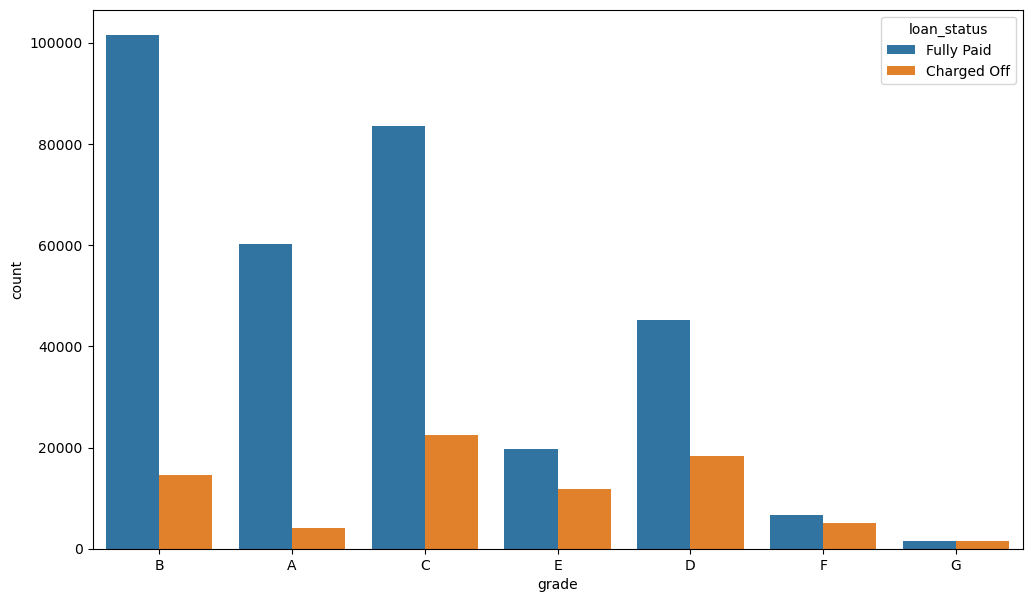

In [14]:
#checking for relationship between the grade and loan status
plt.figure(figsize =  (12,7))
sns.countplot(
    x = 'grade',
    hue="loan_status",
data = df)
plt.show()

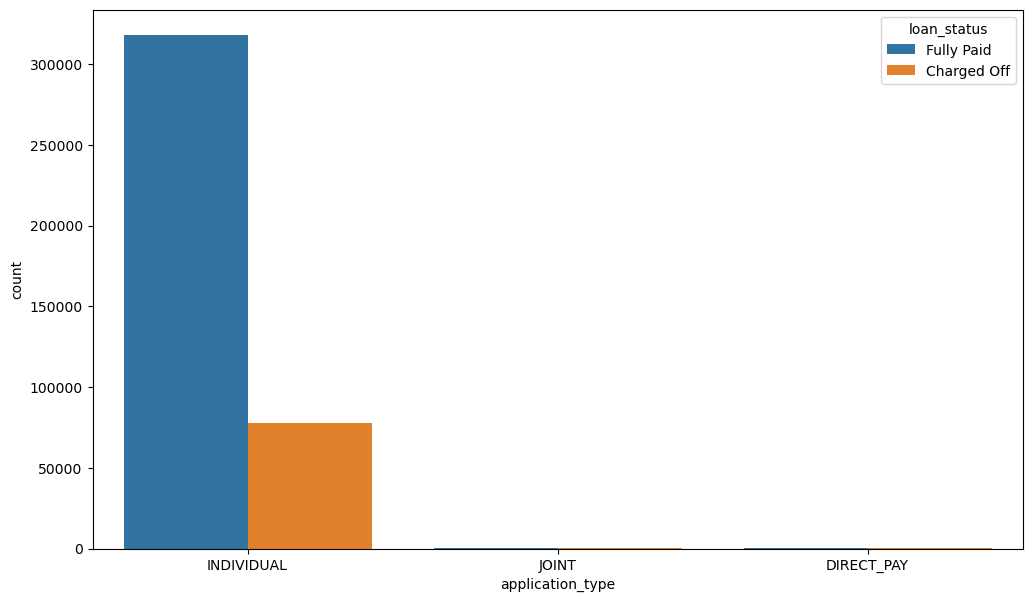

In [15]:
#checking for relationship between the application_type and loan status
plt.figure(figsize =  (12,7))
sns.countplot(
    x = 'application_type',
    hue="loan_status",
data = df)
plt.show()

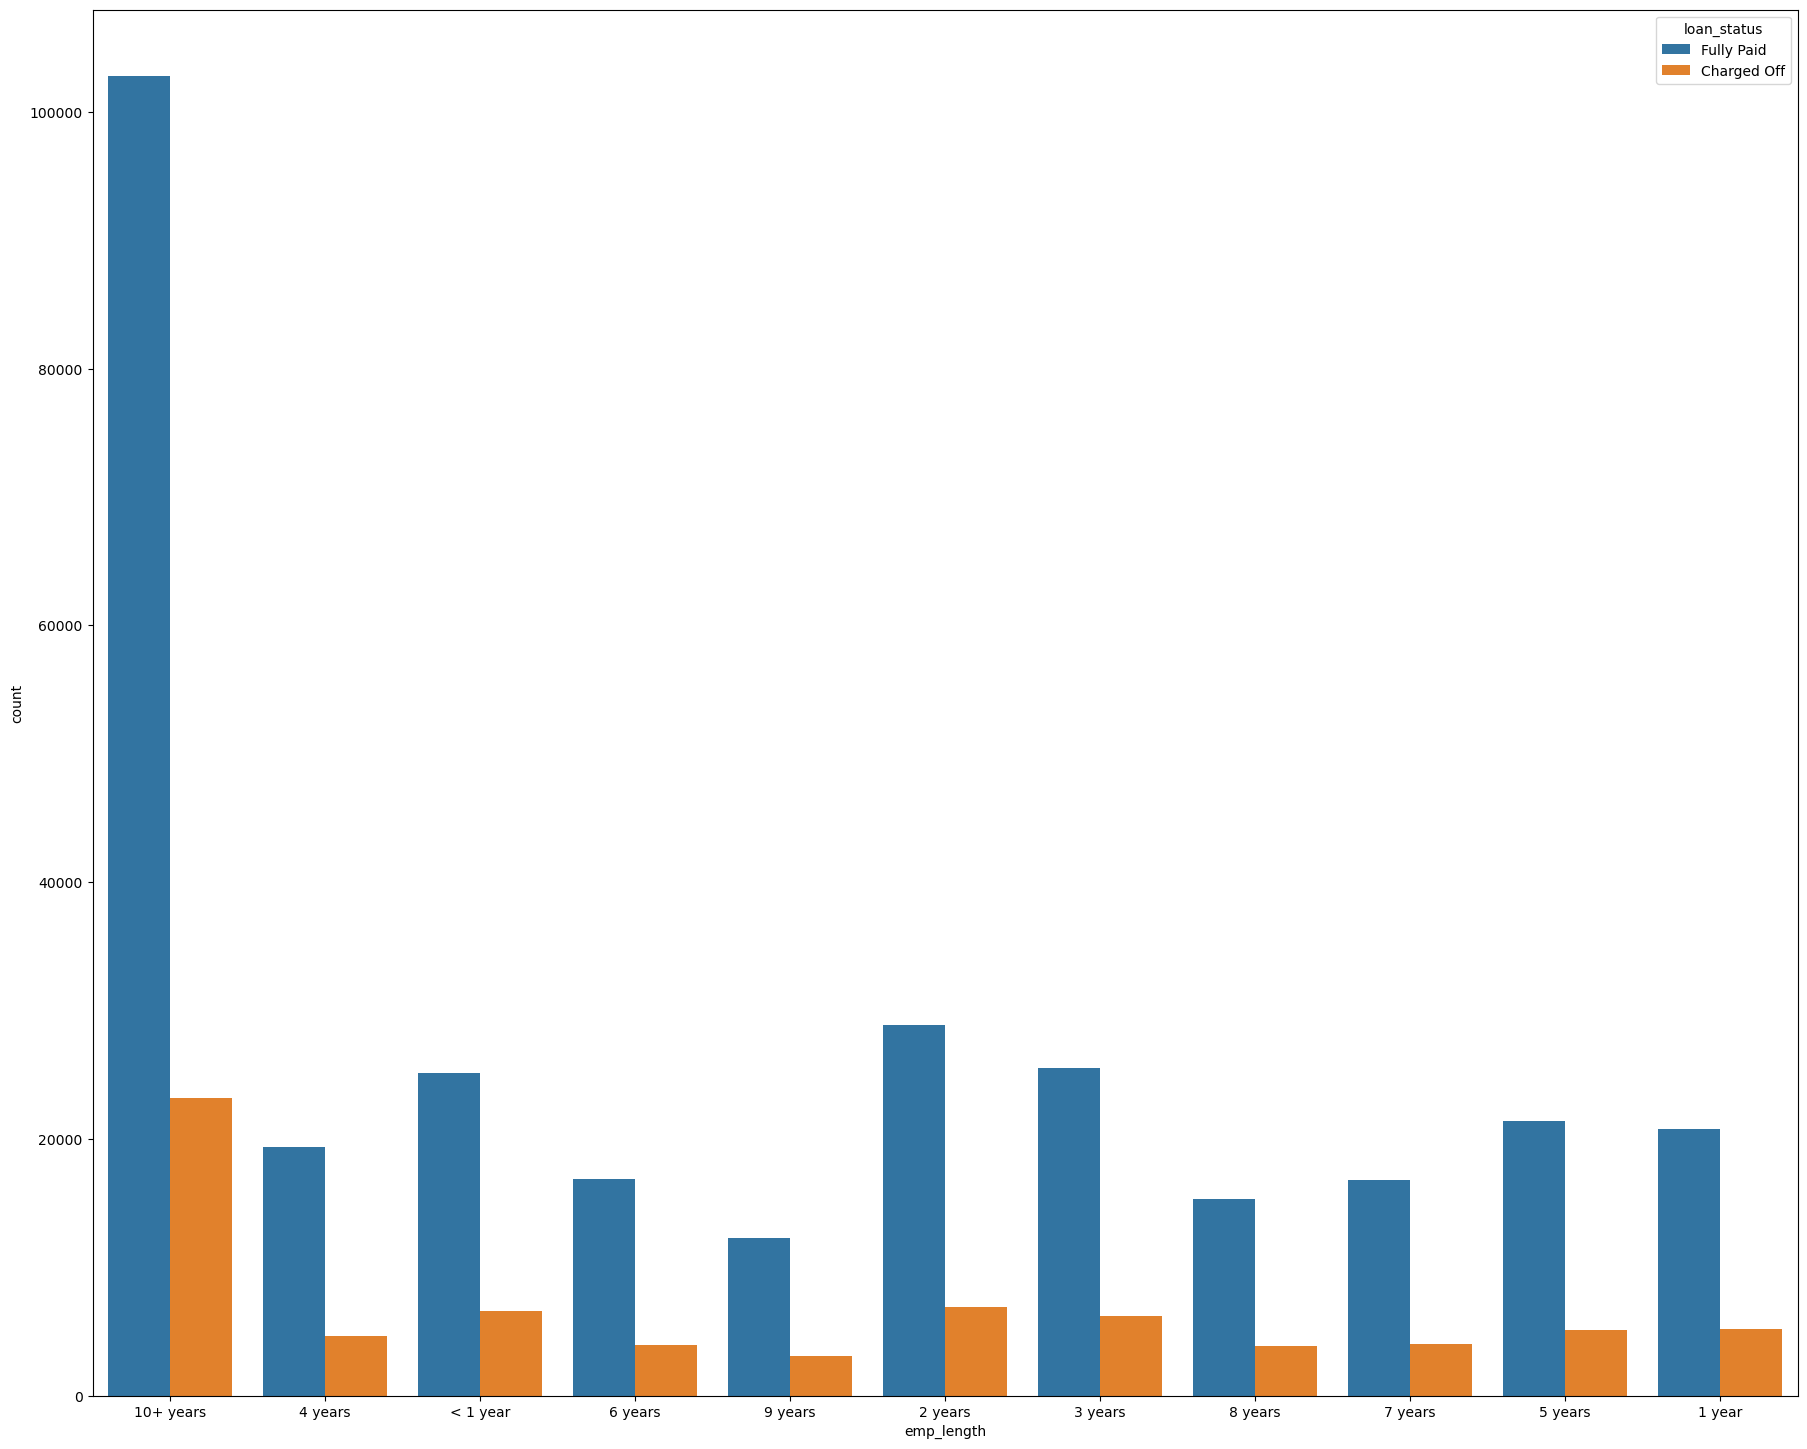

In [16]:
#checking for relationship between the emp_length and loan status
plt.figure(figsize =  (22,18))
sns.countplot(
    x = 'emp_length',
    hue="loan_status",
data = df)
plt.show()

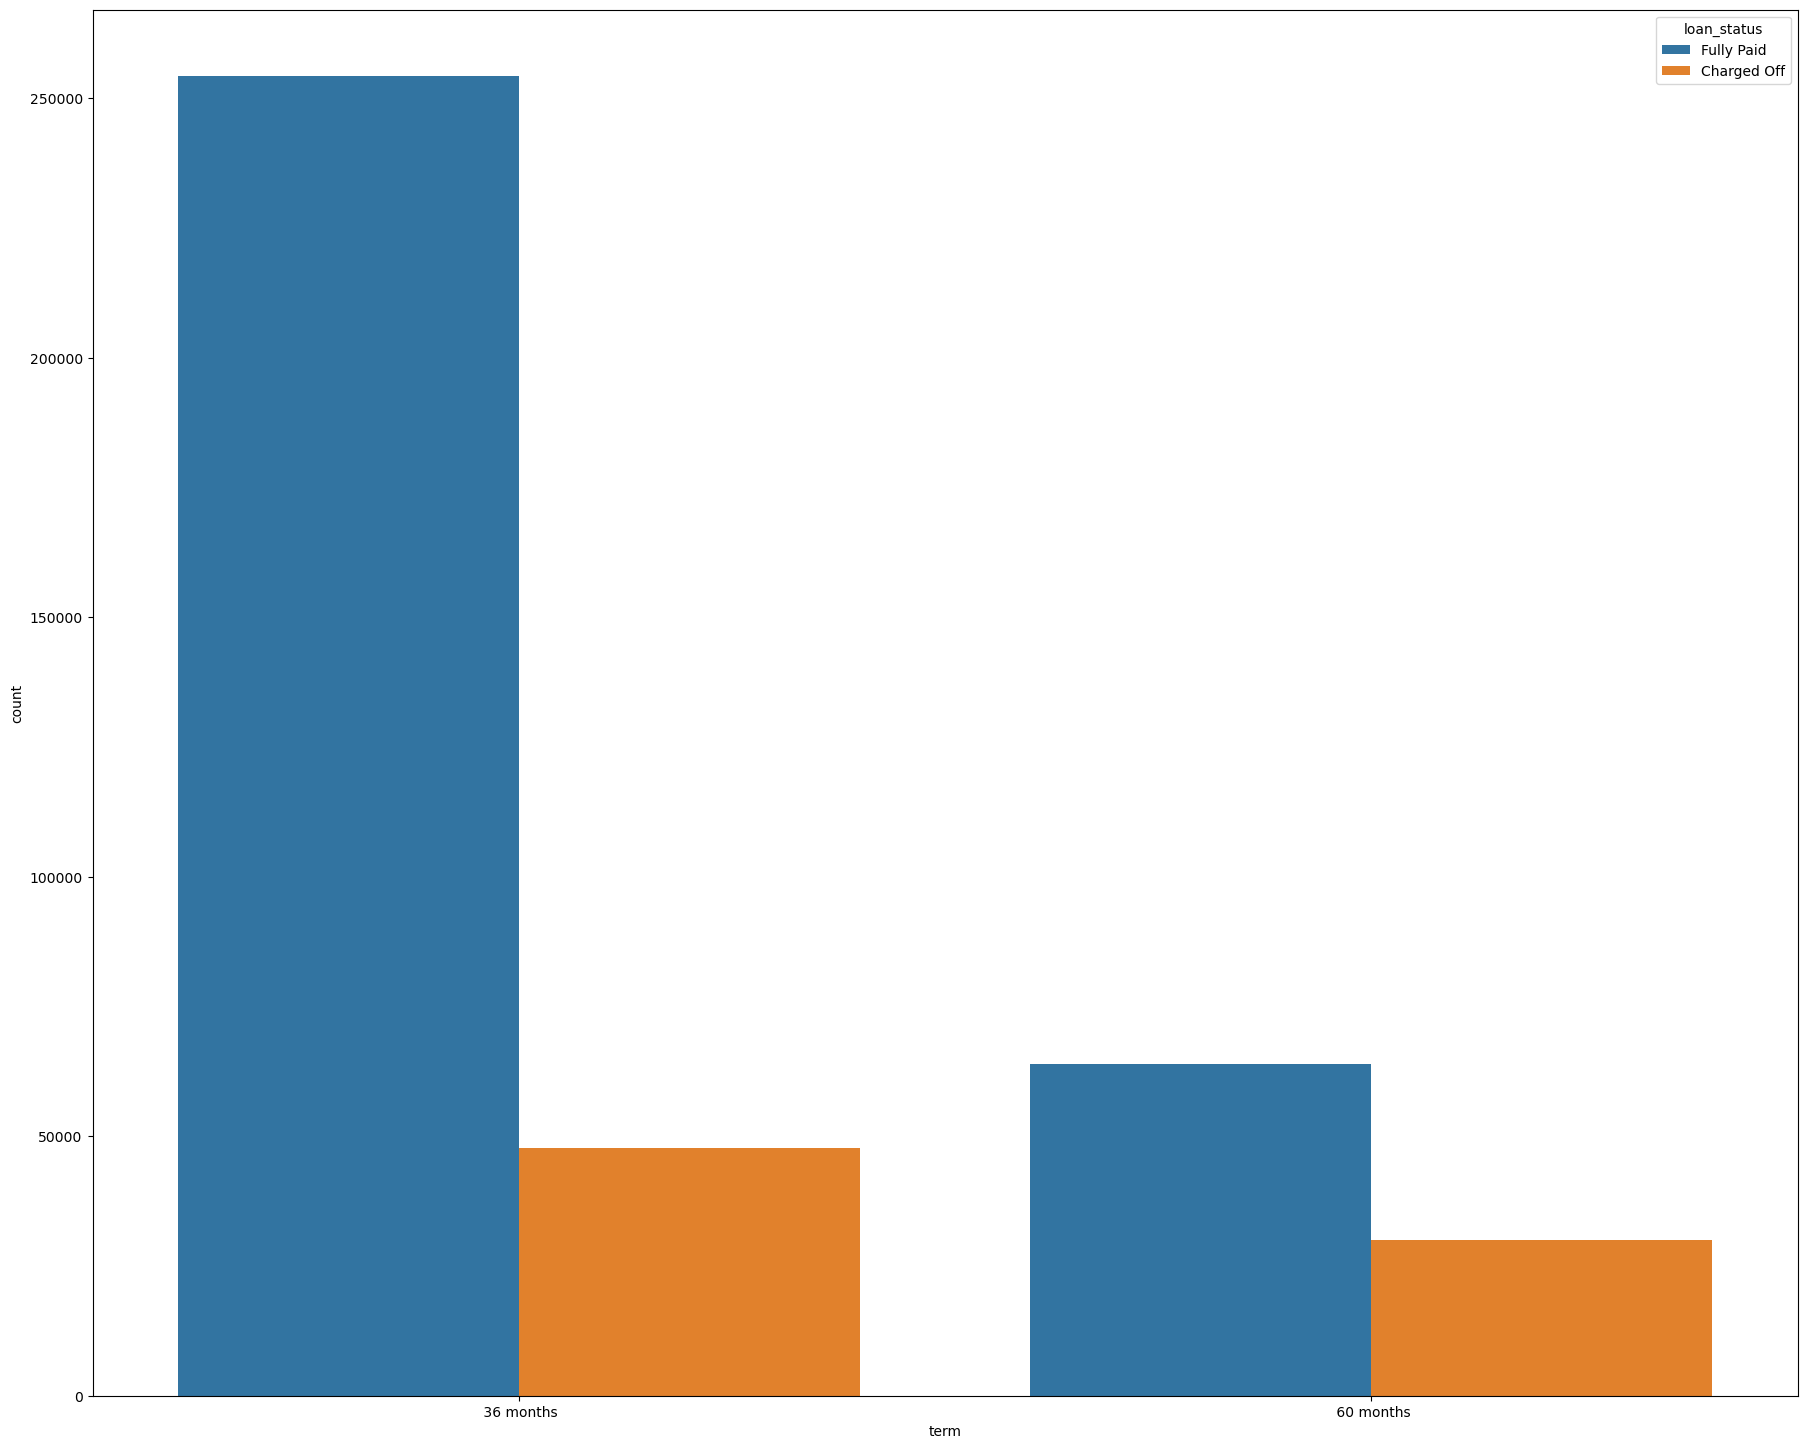

In [17]:
#checking for relationship between term and loan status
plt.figure(figsize =  (22,18))
sns.countplot(
    x = 'term',
    hue="loan_status",
data = df)
plt.show()

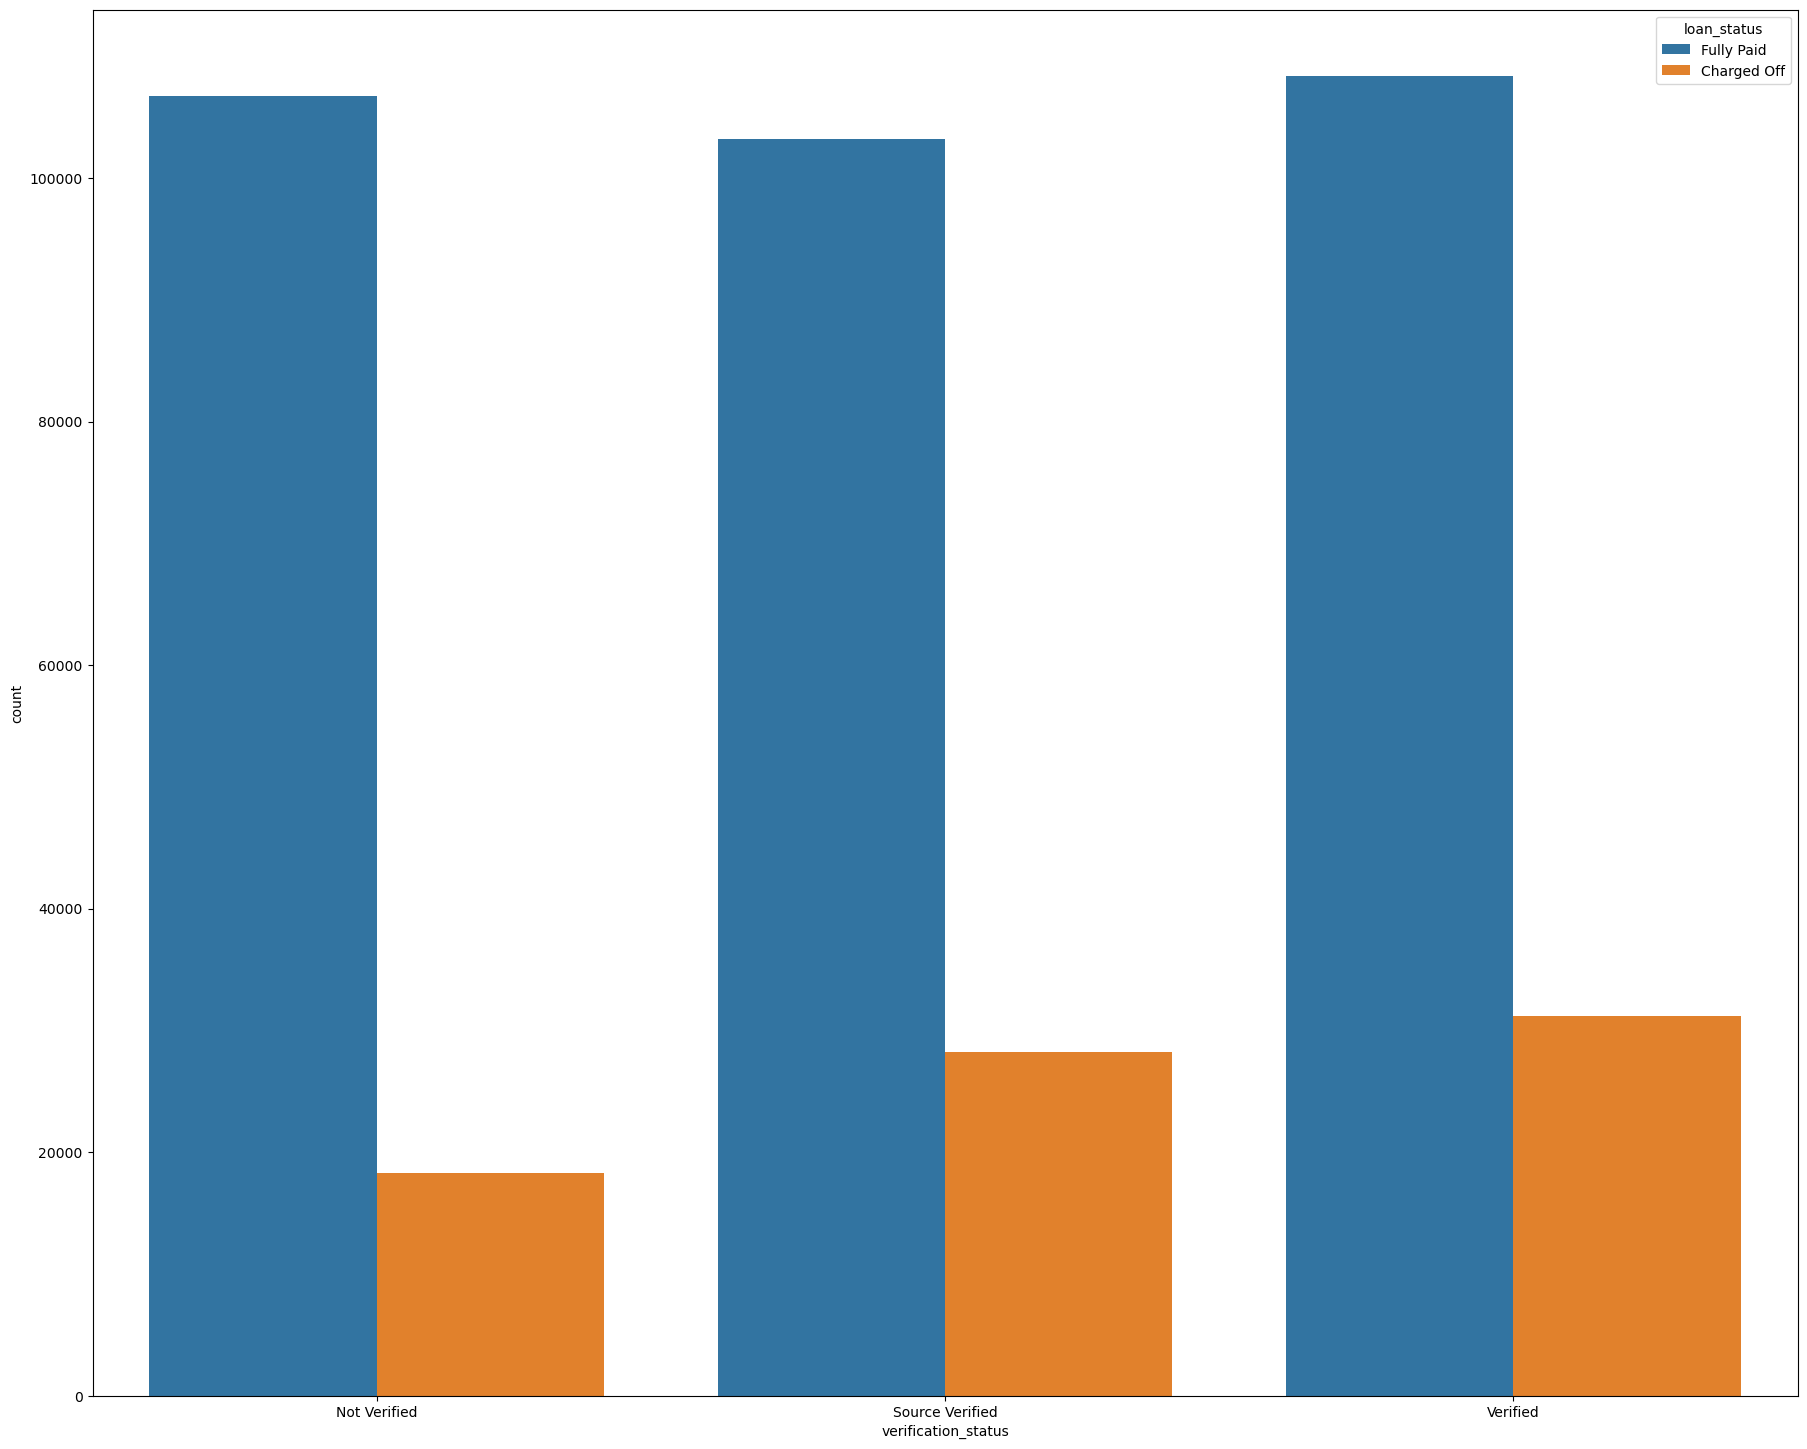

In [18]:
#checking for relationship between the verification_status and loan status
plt.figure(figsize =  (22,18))
sns.countplot(
    x = 'verification_status',
    hue="loan_status",
data = df)
plt.show()

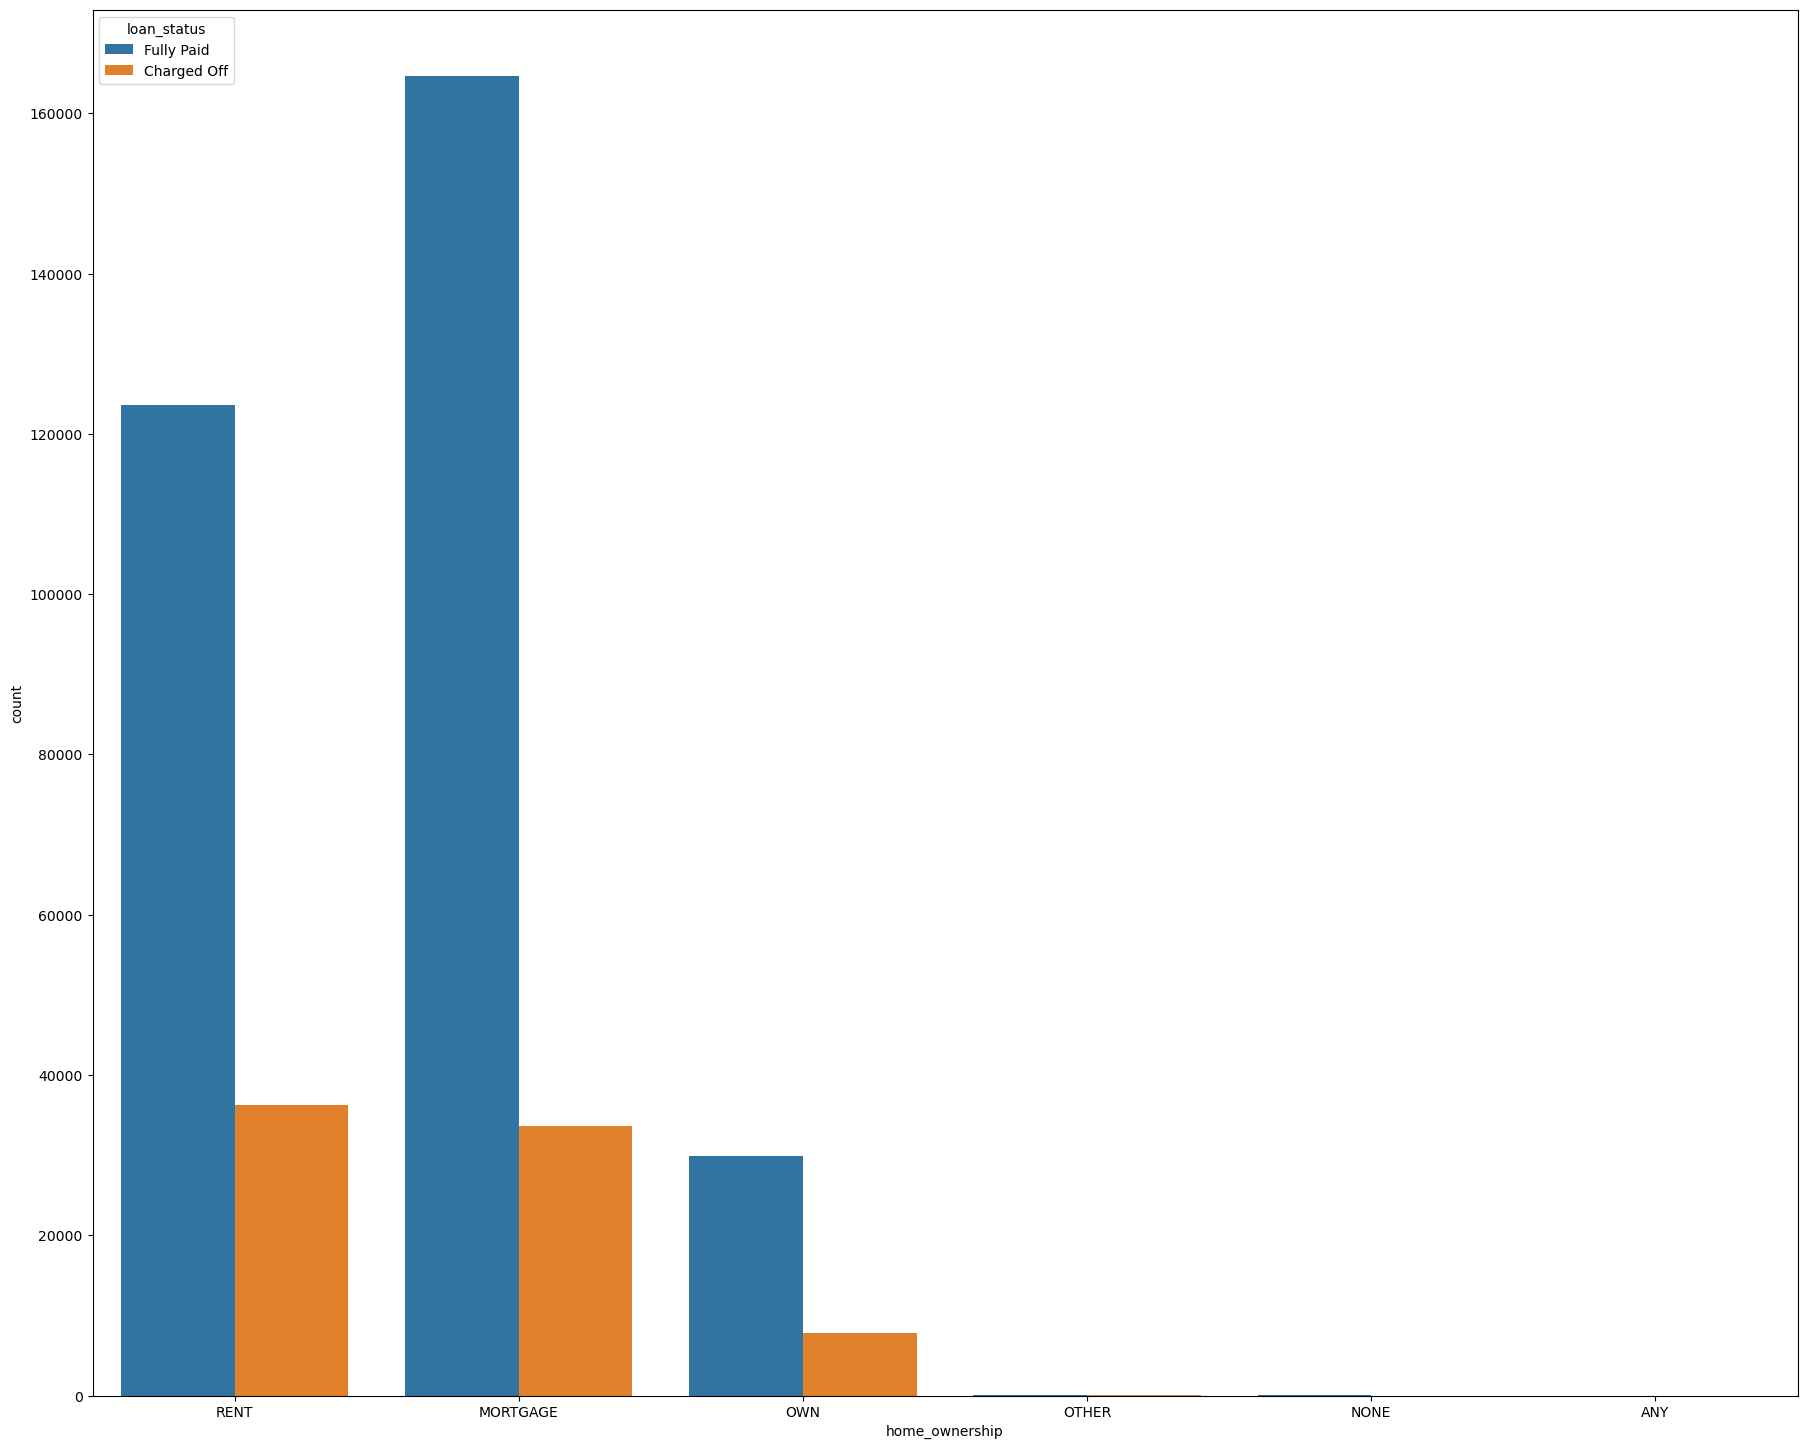

In [19]:
#checking for relationship between the home_ownership  and loan status
plt.figure(figsize =  (22,18))
sns.countplot(
    x = 'home_ownership',
    hue="loan_status",
data = df)
plt.show()

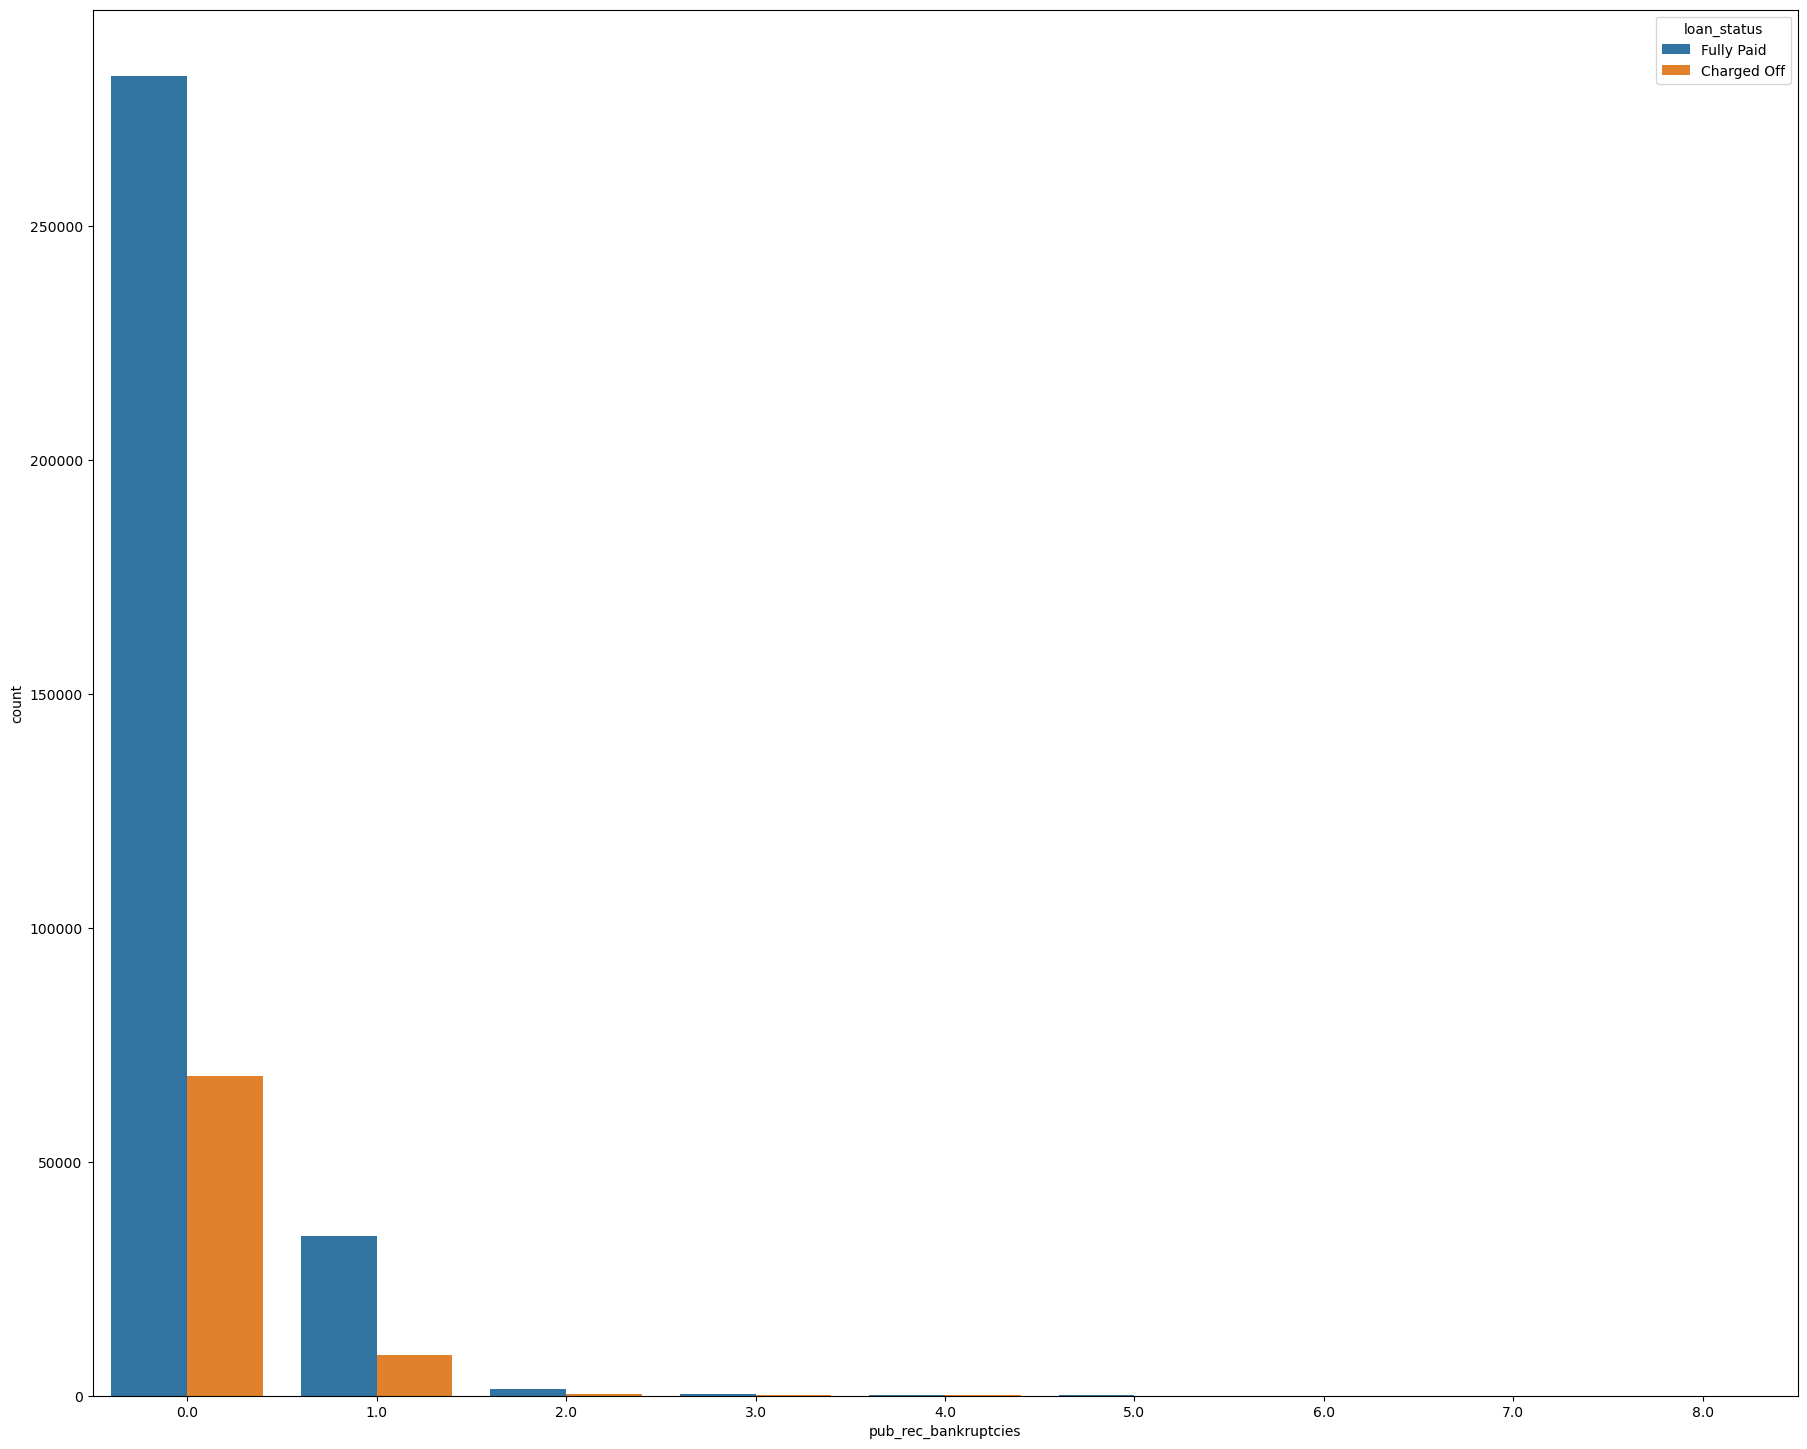

In [20]:
#checking for relationship between the pub_rec_bankruptcies and loan status
plt.figure(figsize =  (22,18))
sns.countplot(
    x = 'pub_rec_bankruptcies',
    hue="loan_status",
data = df)
plt.show()

In [21]:
#dropping the employment title, title and employment length reason being that they are redundant
df.drop("emp_title", axis = 1, inplace = True)

df.drop("emp_length", axis = 1, inplace = True)


df.drop("title", axis = 1, inplace = True)

In [22]:
df["home_ownership"] = df["home_ownership"].replace(["NONE", "ANY"], "OTHER")

df["home_ownership"].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

In [23]:
df["application_type"].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [24]:
#merging joint and direct_pay to others
df["application_type"] = df["application_type"].replace(["JOINT", "DIRECT_PAY"], "OTHER")

df["application_type"].value_counts()

INDIVIDUAL    395319
OTHER            711
Name: application_type, dtype: int64

## inferences:
from the exploration above, from the above, it shows that there are no duplicate data in the dataset. it is glaring that the dataset we are using is imbalance fom the loan_status as many customers fully paid their loans and this can cause a false prediction since the training set would contain more fully paid than a balanced set, hence we would work on it inorder for the ML to predict unbaisedly. it is also noticed that verification status has no effect on the loan status, it also shows from the loan term that more people go for the shorter term loan than the longer one. from the exploration, it can be seen that the emp_length has no much effect on the loan amount likewise the emp_title, features that do not have much effect on the loan_amount would be dropped inorder to make the model more effective

## DATA CLEANING

In [25]:
#extracting information of the from somefeatures in the dataframe using lambda

df["address"].apply(lambda x:x[-5:])

df["zip_code"]= df["address"].apply(lambda x:x[-5:])

df["zip_code"]=pd.to_numeric(df["zip_code"])

df["earliest_cr_line"]= df["earliest_cr_line"].apply(lambda x:x[-4:])

df["earliest_cr_line"]=pd.to_numeric(df["earliest_cr_line"])

df["issue_d"]= df["issue_d"].apply(lambda x:x[-4:])

df["issue_d"]=pd.to_numeric(df["issue_d"])

#converting categorical variabe term int0 numerical values
df["term"]= df["term"].apply(lambda x: int(x[:3]))

#extracting information from the pub_rec using lambda for the df
df["pub_rec"]= df["pub_rec"].apply(lambda x: 0 if x==0 else 1)

#creating the target variable
df["Target"] = df["loan_status"].apply(lambda x: 0 if x == "Fully Paid" else 1)

df.drop("loan_status", axis = 1, inplace = True)

In [26]:
#considering features to drop: subgrade,address,revol_util, pub_rec_bankruptcies
#dropping the subgrade,address, pub_rec_bankruptcies, revol_util
df.drop("sub_grade", axis = 1, inplace = True)

df.drop("address", axis = 1, inplace = True)

df.drop("pub_rec_bankruptcies", axis = 1, inplace = True)

df.drop("revol_util", axis = 1, inplace = True)

In [27]:
#filling in the missing values using mean
df["mort_acc"] = df['mort_acc'].fillna(np.mean(df['mort_acc']))

In [28]:
#rechecking for missing values
df.isna().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
purpose                0
dti                    0
earliest_cr_line       0
open_acc               0
pub_rec                0
revol_bal              0
total_acc              0
initial_list_status    0
application_type       0
mort_acc               0
zip_code               0
Target                 0
dtype: int64

## FEATURE ENGINEERING


In [29]:
#checking the categories of the features and dividing the training data
df_num= df.select_dtypes(include = [ int, float]).copy()
df_cat= df.select_dtypes(exclude = [ int, float]).copy()

In [30]:
#checking the numerical values of x_train
df_num

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,mort_acc,zip_code,Target
0,10000.0,36,11.44,329.48,117000.0,2015,26.24,1990,16.0,0,36369.0,25.0,0.000000,22690,0
1,8000.0,36,11.99,265.68,65000.0,2015,22.05,2004,17.0,0,20131.0,27.0,3.000000,5113,0
2,15600.0,36,10.49,506.97,43057.0,2015,12.79,2007,13.0,0,11987.0,26.0,0.000000,5113,0
3,7200.0,36,6.49,220.65,54000.0,2014,2.60,2006,6.0,0,5472.0,13.0,0.000000,813,0
4,24375.0,60,17.27,609.33,55000.0,2013,33.95,1999,13.0,0,24584.0,43.0,1.000000,11650,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,2015,15.63,2004,6.0,0,1990.0,23.0,0.000000,30723,0
396026,21000.0,36,12.29,700.42,110000.0,2015,21.45,2006,6.0,0,43263.0,8.0,1.000000,5113,0
396027,5000.0,36,9.99,161.32,56500.0,2013,17.56,1997,15.0,0,32704.0,23.0,0.000000,70466,0
396028,21000.0,60,15.31,503.02,64000.0,2012,15.88,1990,9.0,0,15704.0,20.0,5.000000,29597,0


In [31]:
#checking categorical value of X_train
df_cat

,grade,home_ownership,verification_status,purpose,initial_list_status,application_type
0,B,RENT,Not Verified,vacation,w,INDIVIDUAL
1,B,MORTGAGE,Not Verified,debt_consolidation,f,INDIVIDUAL
2,B,RENT,Source Verified,credit_card,f,INDIVIDUAL
3,A,RENT,Not Verified,credit_card,f,INDIVIDUAL
4,C,MORTGAGE,Verified,credit_card,f,INDIVIDUAL
...,...,...,...,...,...,...
396025,B,RENT,Source Verified,debt_consolidation,w,INDIVIDUAL
396026,C,MORTGAGE,Source Verified,debt_consolidation,f,INDIVIDUAL
396027,B,RENT,Verified,debt_consolidation,f,INDIVIDUAL
396028,C,MORTGAGE,Verified,debt_consolidation,f,INDIVIDUAL


In [32]:
df_cat.columns

Index(['grade', 'home_ownership', 'verification_status', 'purpose',
       'initial_list_status', 'application_type'],
      dtype='object')

## converting the categorical data to numerical data

In [33]:
#examining the total numbers of column after one hot encoding the X_train
pd.get_dummies(df, drop_first = True).shape
df = pd.get_dummies(df, drop_first = True)

In [34]:
df.dtypes

loan_amnt                              float64
term                                     int64
int_rate                               float64
installment                            float64
annual_inc                             float64
issue_d                                  int64
dti                                    float64
earliest_cr_line                         int64
open_acc                               float64
pub_rec                                  int64
revol_bal                              float64
total_acc                              float64
mort_acc                               float64
zip_code                                 int64
Target                                   int64
grade_B                                  uint8
grade_C                                  uint8
grade_D                                  uint8
grade_E                                  uint8
grade_F                                  uint8
grade_G                                  uint8
home_ownershi

In [35]:
df["Target"].value_counts()

0    318357
1     77673
Name: Target, dtype: int64

## features selection 

**using univiarate selection technique**

In [36]:
#init the constants
RANDOM_STATE = 123
TEST_SIZE = 0.2
TARGET = "Target"

In [37]:
# independent features
X = df.drop(columns=TARGET)

# Target variable
y = df[TARGET]

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
df
X
y


0         0
1         0
2         0
3         0
4         1
         ..
396025    0
396026    0
396027    0
396028    0
396029    0
Name: Target, Length: 396030, dtype: int64

In [39]:
bestfeatures = SelectKBest(score_func = chi2, k= 'all')
fit = bestfeatures.fit(X,y)

In [40]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [41]:
#concat two dataframe for better visualization
featurescores = pd.concat([dfcolumns,dfscores], axis = 1)
featurescores.columns = ['variables', 'score'] #naming the dataframe columns

In [42]:
featurescores

,variables,score
0,loan_amnt,7.017015e+06
1,term,2.972790e+04
2,int_rate,3.564672e+04
3,installment,9.729833e+04
4,annual_inc,5.789023e+07
5,issue_d,1.580577e+00
6,dti,2.882095e+04
7,earliest_cr_line,1.556521e+01
8,open_acc,7.251644e+02
9,pub_rec,1.111310e+02


In [43]:
#printing the top 10 best features
print(featurescores.nlargest(100, 'score'))

                              variables         score
13                             zip_code  9.188840e+08
4                            annual_inc  5.789023e+07
0                             loan_amnt  7.017015e+06
10                            revol_bal  1.257415e+06
3                           installment  9.729833e+04
2                              int_rate  3.564672e+04
1                                  term  2.972790e+04
6                                   dti  2.882095e+04
17                              grade_E  6.292736e+03
12                             mort_acc  4.492907e+03
18                              grade_F  4.010179e+03
14                              grade_B  3.646910e+03
16                              grade_D  3.451080e+03
19                              grade_G  1.543260e+03
22                  home_ownership_RENT  9.423926e+02
8                              open_acc  7.251644e+02
11                            total_acc  7.049050e+02
24         verification_stat

In [44]:
#printing the top 30 best features
print(featurescores.nsmallest(40, 'score'))

                              variables         score
29                        purpose_house  1.550913e-02
36                     purpose_vacation  7.395401e-01
20                 home_ownership_OTHER  1.379377e+00
5                               issue_d  1.580577e+00
27                  purpose_educational  1.743540e+00
39               application_type_OTHER  2.444076e+00
34             purpose_renewable_energy  2.999540e+00
31                      purpose_medical  1.171709e+01
7                      earliest_cr_line  1.556521e+01
38                initial_list_status_w  2.143637e+01
32                       purpose_moving  2.701196e+01
21                   home_ownership_OWN  2.727850e+01
33                        purpose_other  3.461106e+01
30               purpose_major_purchase  5.495676e+01
37                      purpose_wedding  6.511071e+01
28             purpose_home_improvement  1.034288e+02
9                               pub_rec  1.111310e+02
15                          

In [45]:
df.shape

(396030, 41)

**features selection using Correlation Matrix Heatmap technique**

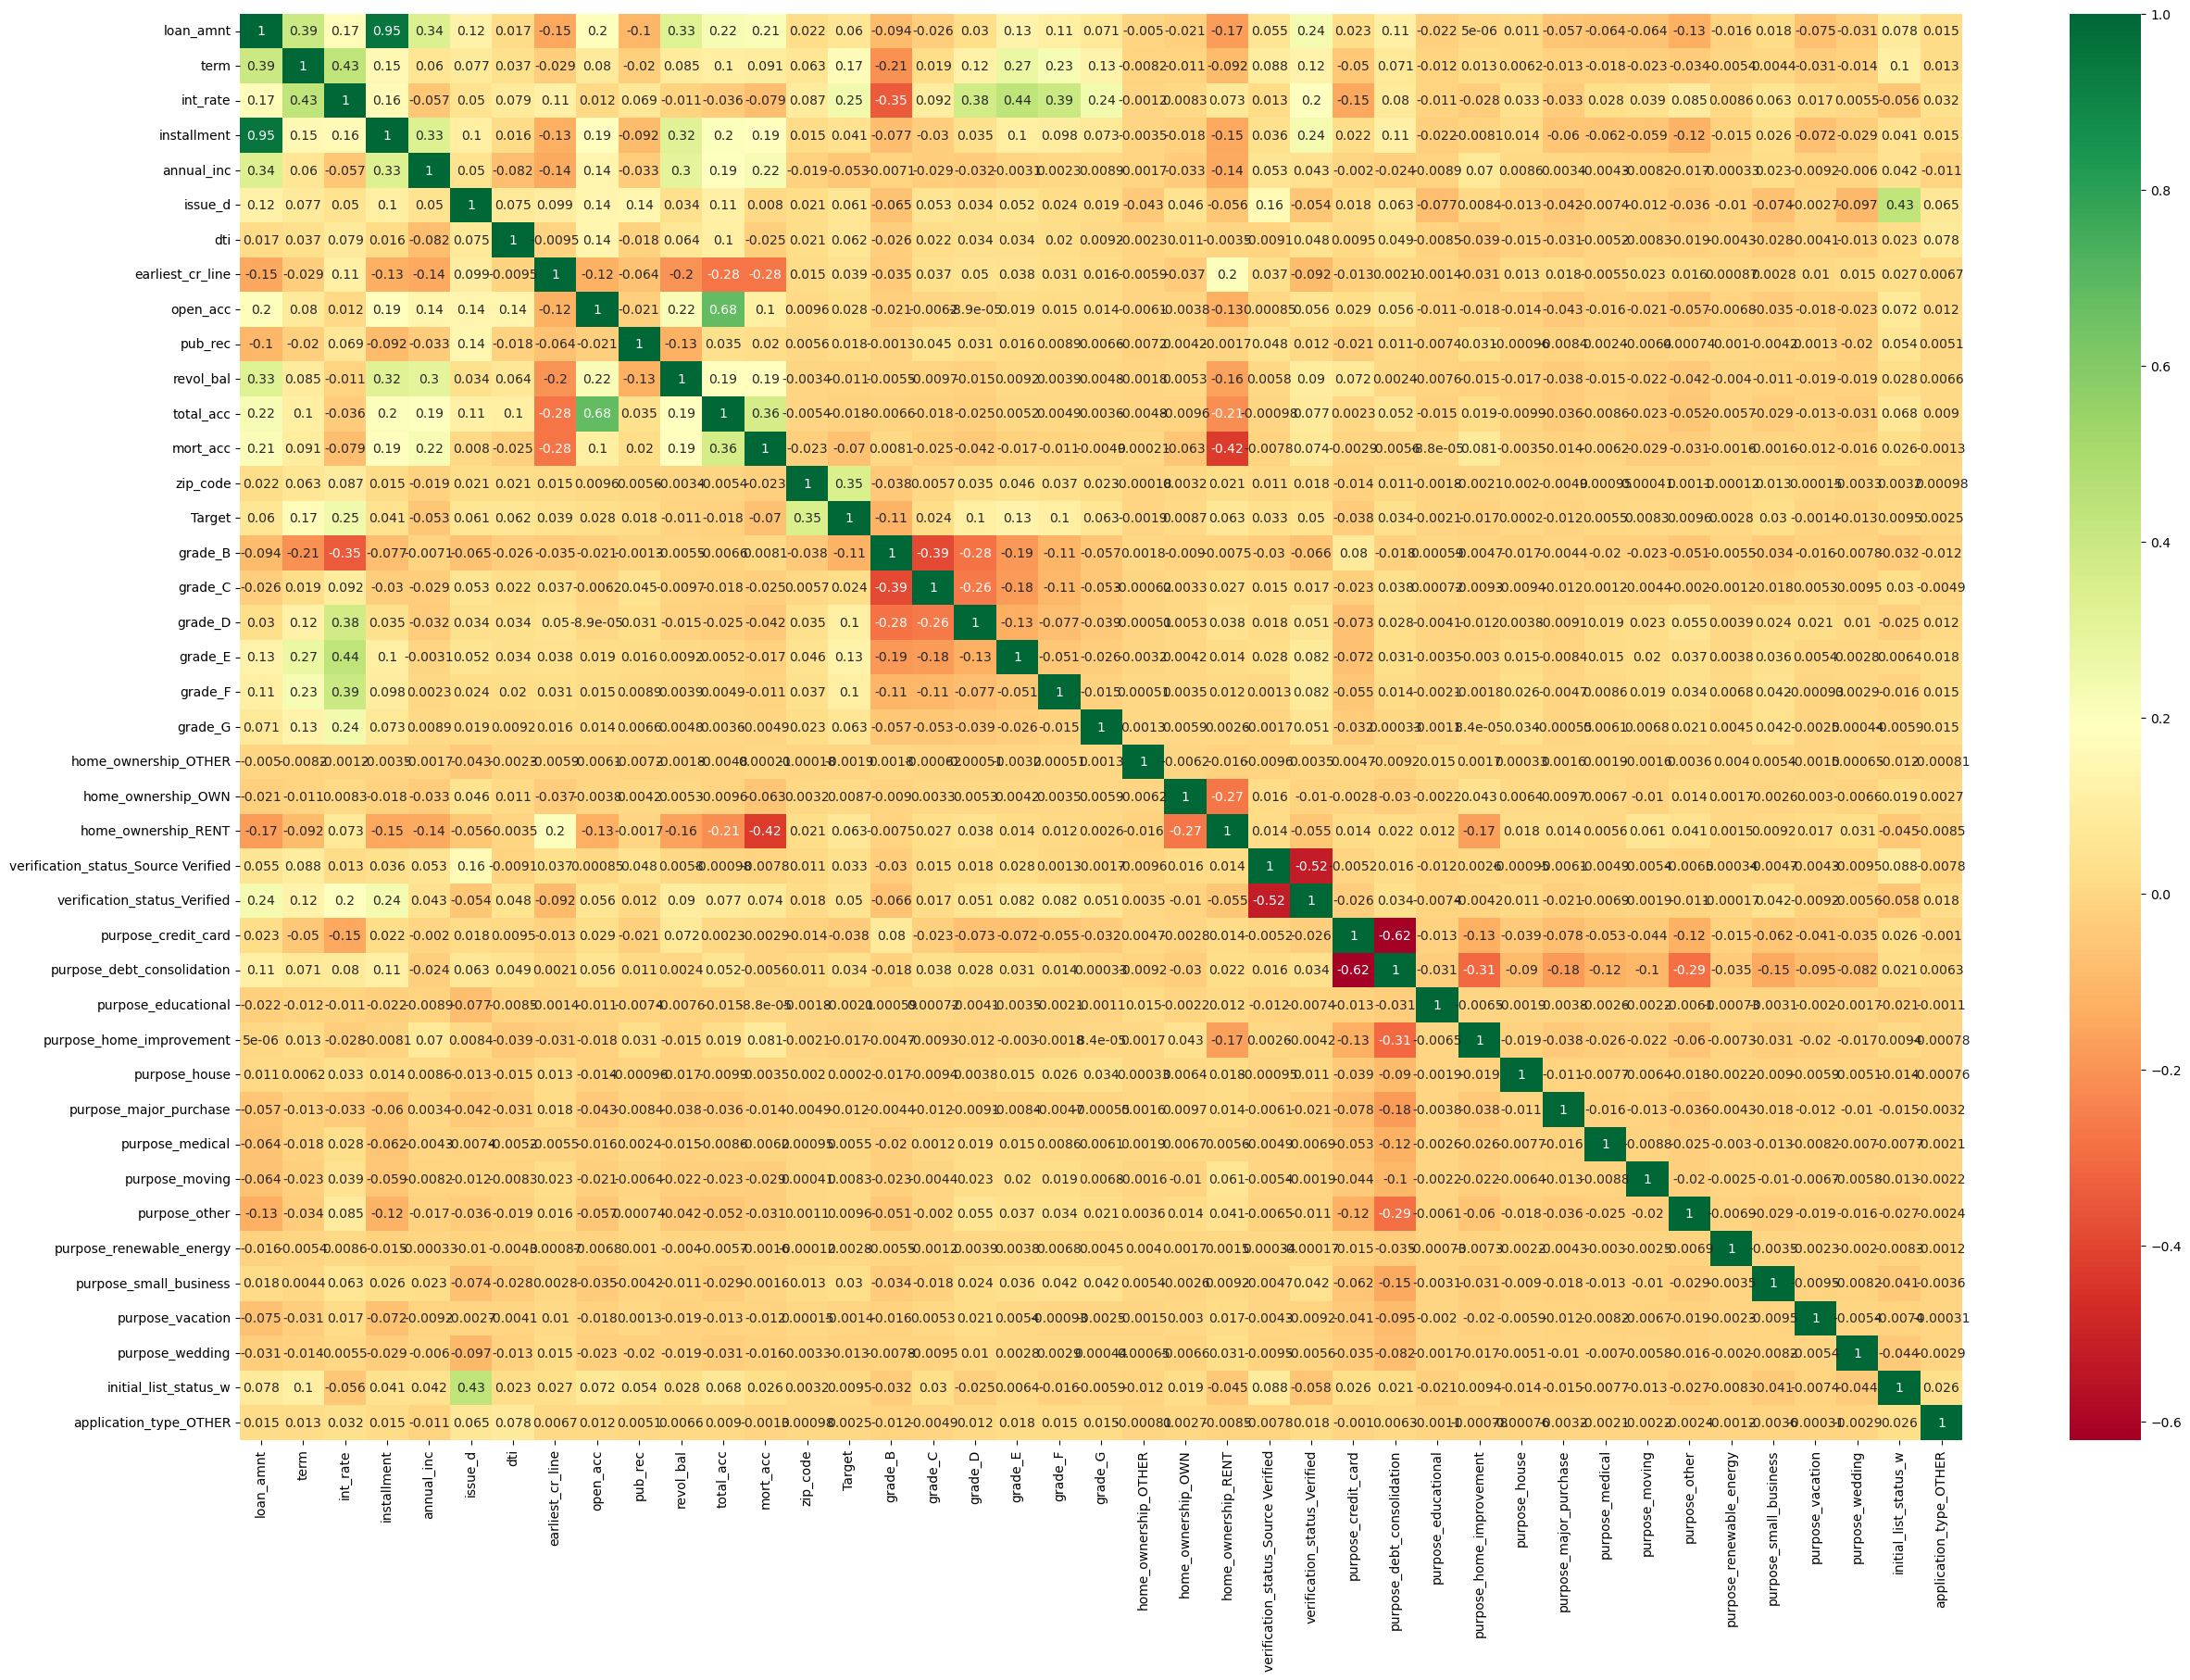

In [46]:
#getting correlations of each features in the dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize= (30,20))
#plot map
g = sns.heatmap(df[top_corr_features].corr(), annot = True, cmap = 'RdYlGn')

In [47]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,mort_acc,zip_code,Target,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_OTHER
0,10000.0,36,11.44,329.48,117000.0,2015,26.24,1990,16.0,0,36369.0,25.0,0.0,22690,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,8000.0,36,11.99,265.68,65000.0,2015,22.05,2004,17.0,0,20131.0,27.0,3.0,5113,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,2015,12.79,2007,13.0,0,11987.0,26.0,0.0,5113,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,2014,2.60,2006,6.0,0,5472.0,13.0,0.0,813,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,2013,33.95,1999,13.0,0,24584.0,43.0,1.0,11650,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
#getting the statistical measures
df.describe()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,mort_acc,zip_code,Target,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_OTHER
count,396030.000000,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000
mean,14113.888089,41.698053,13.639400,431.849698,7.420318e+04,2013.629074,17.379514,1997.857667,11.311153,0.145842,1.584454e+04,25.414744,1.813991,33998.447686,0.196129,0.292953,0.267624,0.160402,0.079509,0.029725,0.007712,0.000369,0.095311,0.403480,0.331755,0.352405,0.209628,0.592145,0.000649,0.060677,0.005558,0.022195,0.010595,0.007207,0.053493,0.000831,0.014395,0.006191,0.004575,0.398869,0.001795
std,8357.441341,10.212038,4.472157,250.727790,6.163762e+04,1.481725,18.019092,7.198387,5.137649,0.352949,2.059184e+04,11.886991,2.042867,25605.865779,0.397068,0.455117,0.442721,0.366979,0.270532,0.169828,0.087476,0.019197,0.293644,0.490596,0.470844,0.477720,0.407044,0.491437,0.025466,0.238738,0.074342,0.147318,0.102386,0.084585,0.225016,0.028811,0.119114,0.078442,0.067487,0.489666,0.042333
min,500.000000,36.000000,5.320000,16.080000,0.000000e+00,2007.000000,0.000000,1944.000000,0.000000,0.000000,0.000000e+00,2.000000,0.000000,813.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,36.000000,10.490000,250.330000,4.500000e+04,2013.000000,11.280000,1994.000000,8.000000,0.000000,6.025000e+03,17.000000,0.000000,11650.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12000.000000,36.000000,13.330000,375.430000,6.400000e+04,2014.000000,16.910000,1999.000000,10.000000,0.000000,1.118100e+04,24.000000,1.000000,29597.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20000.000000,36.000000,16.490000,567.300000,9.000000e+04,2015.000000,22.980000,2003.000000,14.000000,0.000000,1.962000e+04,32.000000,3.000000,48052.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,40000.000000,60.000000,30.990000,1533.810000,8.706582e+06,2016.000000,9999.000000,2013.000000,90.000000,1.000000,1.743266e+06,151.000000,34.000000,93700.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Selection 

In [66]:
print(X)

        loan_amnt  term  int_rate  installment  annual_inc  issue_d    dti  \
0         10000.0    36     11.44       329.48    117000.0     2015  26.24   
1          8000.0    36     11.99       265.68     65000.0     2015  22.05   
2         15600.0    36     10.49       506.97     43057.0     2015  12.79   
3          7200.0    36      6.49       220.65     54000.0     2014   2.60   
4         24375.0    60     17.27       609.33     55000.0     2013  33.95   
...           ...   ...       ...          ...         ...      ...    ...   
396025    10000.0    60     10.99       217.38     40000.0     2015  15.63   
396026    21000.0    36     12.29       700.42    110000.0     2015  21.45   
396027     5000.0    36      9.99       161.32     56500.0     2013  17.56   
396028    21000.0    60     15.31       503.02     64000.0     2012  15.88   
396029     2000.0    36     13.61        67.98     42996.0     2010   8.32   

        earliest_cr_line  open_acc  pub_rec  revol_bal  total_a

In [67]:
print(y)

0         0
1         0
2         0
3         0
4         1
         ..
396025    0
396026    0
396027    0
396028    0
396029    0
Name: Target, Length: 396030, dtype: int64


In [68]:
X= np.asarray(X)
y= np.asarray(y)

In [69]:
#data standardization
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [70]:
scaler.fit(X)

StandardScaler()

In [71]:
standardized_data= scaler.transform(X)

In [72]:
print(standardized_data)

[[-0.49224315 -0.55797482 -0.49179907 ... -0.06779706  1.22763603
  -0.04240929]
 [-0.73155115 -0.55797482 -0.36881576 ... -0.06779706 -0.81457368
  -0.04240929]
 [ 0.17781923 -0.55797482 -0.70422477 ... -0.06779706 -0.81457368
  -0.04240929]
 ...
 [-1.09051314 -0.55797482 -0.81602778 ... -0.06779706 -0.81457368
  -0.04240929]
 [ 0.82395082  1.79219555  0.37355619 ... -0.06779706 -0.81457368
  -0.04240929]
 [-1.44947513 -0.55797482 -0.00657403 ... -0.06779706 -0.81457368
  -0.04240929]]


In [73]:
X = standardized_data
y = df[TARGET]

In [76]:
#splitting the data into train dataset and test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, stratify = y, random_state=RANDOM_STATE, 
)
#Checking the shapes
X.shape, X_train.shape, X_test.shape

((396030, 40), (316824, 40), (79206, 40))

In [178]:
#list of models
models = [LogisticRegression(max_iter=1000), DecisionTreeClassifier(min_samples_split = 30,min_samples_leaf = 10, random_state = 123), KNeighborsClassifier(),GaussianNB(), SVC(kernel = 'linear')]

In [179]:
#classify function to compare various classification model inorder to know which might perform best
def compare_models_cross_validation():
    
    for model in models:
        
#cross validation is used for validating the model 

        cv_score = cross_val_score(model, x, y, cv= 5)
        mean_accuracy = sum(cv_score)/len(cv_score)
        mean_accuracy = mean_accuracy*100
        mean_accuracy = round(mean_accuracy, 2)
        
        print('Cross Validation accuracies for the', model , '=', cv_score)
        print('Accuracy score of the ', model, '=', mean_accuracy, '%')
        print('---------------------------------------------------------------------------------')

In [ ]:
compare_models_cross_validation()

Cross Validation accuracies for the LogisticRegression(max_iter=1000) = [0.83767644 0.83854758 0.83762594 0.83696942 0.83580789]
Accuracy score of the  LogisticRegression(max_iter=1000) = 83.73 %
---------------------------------------------------------------------------------
Cross Validation accuracies for the DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=30,
                       random_state=123) = [0.86733328 0.86881044 0.86887357 0.86653789 0.86941646]
Accuracy score of the  DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=30,
                       random_state=123) = 86.82 %
---------------------------------------------------------------------------------


In [99]:
#checking for the accuracy score , precision score, ... of logistic regression model
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve

In [100]:
def CMatrix(CM, labels = ['fully_paid', 'Charged_off']):
    df = pd.DataFrame( data = CM, index = labels, columns = labels)
    df.index.name ='TRUE'
    df.columns.name = 'PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis = 1)
    return df

In [101]:
metrics = pd.DataFrame(index = ['accuracy', 'precision', 'recall'],
                       columns = ['NULL', 'LogisticReg', 'ClassTree'])

In [102]:
y_pred_test = np.repeat(y_train.value_counts().idxmax(), y_test.size)
metrics.loc['accuracy','NULL']= accuracy_score(y_pred = y_pred_test, y_true = y_test)
metrics.loc['precision','NULL'] = precision_score(y_pred = y_pred_test, y_true = y_test)
metrics.loc['recall','NULL']=recall_score(y_pred = y_pred_test, y_true = y_test)

CM = confusion_matrix(y_pred = y_pred_test, y_true = y_test)
CMatrix(CM)

PREDICTION,fully_paid,Charged_off,Total
TRUE,,,
fully_paid,63671,0,63671
Charged_off,15535,0,15535
Total,79206,0,79206


## LOGISTIC REGRESSION MODEL

In [149]:
#creating an instance
logistic_regression= LogisticRegression(n_jobs = -1, random_state = 123)

#use the training data to train the estimator
logistic_regression.fit(X_train, y_train)

#evaluate the model
y_pred_test = logistic_regression.predict(X_test)
metrics.loc['accuracy','LogisticReg']= accuracy_score(y_pred = y_pred_test, y_true = y_test)
metrics.loc['precision','LogisticReg'] = precision_score(y_pred = y_pred_test, y_true = y_test)
metrics.loc['recall','LogisticReg']=recall_score(y_pred = y_pred_test, y_true = y_test)

#confusion matrix
CM = confusion_matrix(y_pred = y_pred_test, y_true = y_test)
CMatrix(CM)

PREDICTION,fully_paid,Charged_off,Total
TRUE,,,
fully_paid,61619,2052,63671
Charged_off,10831,4704,15535
Total,72450,6756,79206


**EVALUATION FOR LOGISTIC REGRESSION MODEL**

In [150]:
y_pred_test = logistic_regression.predict(X_test)

In [151]:
def create_result_dataframe (*, y_true: np.ndarray, y_pred:np.ndarray) -> pd.DataFrame:
    
    """this returns a Dataframe containing the true, predicted and error values"""
    #convert prediction to dataframe
    result = pd.DataFrame() #empty df
    
    result["Actual_score"] = y_true
    result["Predicted_score"] = y_pred
    result["Error_in_predictions"] = result["Actual_score"] - result["Predicted_score"]
   
    return result

In [152]:
result = create_result_dataframe(y_true = y_test, y_pred = y_pred_test)
result.sample(n=50,random_state = RANDOM_STATE)

,Actual_score,Predicted_score,Error_in_predictions
320058,0,0,0
256168,0,0,0
294349,0,0,0
84163,1,1,0
367345,0,0,0
225661,0,0,0
151836,0,0,0
338633,0,0,0
58942,0,0,0
265922,0,0,0


In [153]:
def evaluate_model(*, y_true: np.ndarray, y_pred: np.ndarray) -> str:
    """This is used to evaluate a regressor."""
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

    # Mean Squared Error (The lower, the better)
    mse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=True)

    # Root Mean Squared Error (The lower, the better)
    # Remember to use squared=False
    rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)

    # Mean Absolute Error (The lower, the better)
    mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)

    # R Squared (The higher, the better. Max (best) value is 1)
    R2 = r2_score(y_true=y_true, y_pred=y_pred)

    result_str = (
        "==================== Evaluation Metrics ===================="
        f"\nMean Squared Error (The lower, the better!): {round(mse, 3)}"
        f"\nRoot Mean Squared Error (The lower, the better!): {round(rmse, 3)}"
        f"\nMean Absolute Error (The lower, the better!): {round(mae, 3)}"
        "\n==========================================================="
        f"\nR Squared (The higher, the better!): {round(R2, 3)} "
    )

    return result_str

In [154]:
print(evaluate_model(y_true = y_test, y_pred = y_pred_test))

==================== Evaluation Metrics ====================
Mean Squared Error (The lower, the better!): 0.163
Root Mean Squared Error (The lower, the better!): 0.403
Mean Absolute Error (The lower, the better!): 0.163
R Squared (The higher, the better!): -0.032 


## CLASSIFICATION TREES MODEL

In [155]:
#import the estimator model
from sklearn.tree import DecisionTreeClassifier

#creating an instance
class_tree= DecisionTreeClassifier(min_samples_split = 30,min_samples_leaf = 10, random_state = 123)

#use the training data to train the estimator
class_tree.fit(X_train, y_train)

#evaluate the model
y_pred_test = class_tree.predict(X_test)
metrics.loc['accuracy','ClassTree']= accuracy_score(y_pred = y_pred_test, y_true = y_test)
metrics.loc['precision','ClassTree'] = precision_score(y_pred = y_pred_test, y_true = y_test)
metrics.loc['recall','ClassTree']=recall_score(y_pred = y_pred_test, y_true = y_test)

#confusion matrix
CM = confusion_matrix(y_pred = y_pred_test, y_true = y_test)
CMatrix(CM)

PREDICTION,fully_paid,Charged_off,Total
TRUE,,,
fully_paid,60141,3530,63671
Charged_off,6899,8636,15535
Total,67040,12166,79206


**EVALUATION FOR CLASSIFICATION TREE MODEL**

In [156]:
def create_result_dataframe (*, y_true: np.ndarray, y_pred:np.ndarray) -> pd.DataFrame:
    
    """this returns a Dataframe containing the true, predicted and error values"""
    #convert prediction to dataframe
    result = pd.DataFrame() #empty df
    
    result["Actual_score"] = y_true
    result["Predicted_score"] = y_pred_test
    result["Error_in_predictions"] = result["Actual_score"] - result["Predicted_score"]
   
    return result

In [157]:
result = create_result_dataframe(y_true = y_test, y_pred = y_pred_test)
result.sample(n=50,random_state = RANDOM_STATE)

,Actual_score,Predicted_score,Error_in_predictions
320058,0,0,0
256168,0,0,0
294349,0,0,0
84163,1,1,0
367345,0,0,0
225661,0,0,0
151836,0,0,0
338633,0,0,0
58942,0,0,0
265922,0,0,0


In [158]:
def evaluate_model(*, y_true: np.ndarray, y_pred: np.ndarray) -> str:
    """This is used to evaluate a regressor."""
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

    # Mean Squared Error (The lower, the better)
    mse = mean_squared_error(y_true=y_true, y_pred=y_pred_test, squared=True)

    # Root Mean Squared Error (The lower, the better)
    # Remember to use squared=False
    rmse = mean_squared_error(y_true=y_true, y_pred=y_pred_test, squared=False)

    # Mean Absolute Error (The lower, the better)
    mae = mean_absolute_error(y_true=y_true, y_pred=y_pred_test)

    # R Squared (The higher, the better. Max (best) value is 1)
    R2 = r2_score(y_true=y_true, y_pred=y_pred_test)

    result_str = (
        "==================== Evaluation Metrics ===================="
        f"\nMean Squared Error (The lower, the better!): {round(mse, 3)}"
        f"\nRoot Mean Squared Error (The lower, the better!): {round(rmse, 3)}"
        f"\nMean Absolute Error (The lower, the better!): {round(mae, 3)}"
        "\n==========================================================="
        f"\nR Squared (The higher, the better!): {round(R2, 3)} "
    )

    return result_str

In [159]:
print(evaluate_model(y_true = y_test, y_pred = y_pred_test))

==================== Evaluation Metrics ====================
Mean Squared Error (The lower, the better!): 0.132
Root Mean Squared Error (The lower, the better!): 0.363
Mean Absolute Error (The lower, the better!): 0.132
R Squared (The higher, the better!): 0.165 


In [160]:
100 * metrics

,NULL,LogisticReg,ClassTree
accuracy,80.386587,83.734818,86.833068
precision,0.0,69.626998,70.984711
recall,0.0,30.280013,55.590602


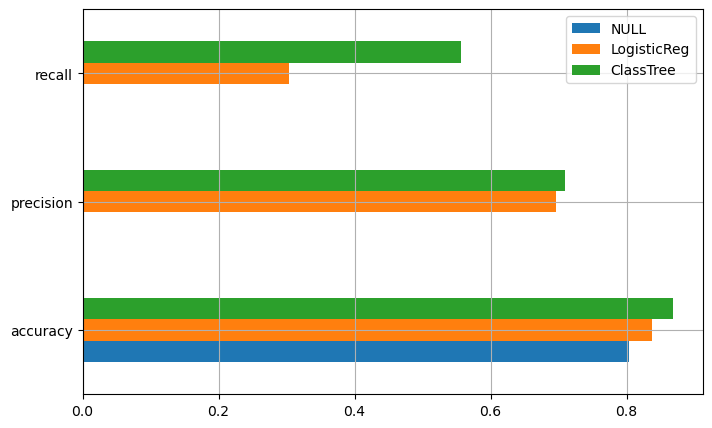

In [161]:
fig, ax = plt.subplots(figsize = (8,5))
metrics.plot(kind='barh', ax = ax)
ax.grid();

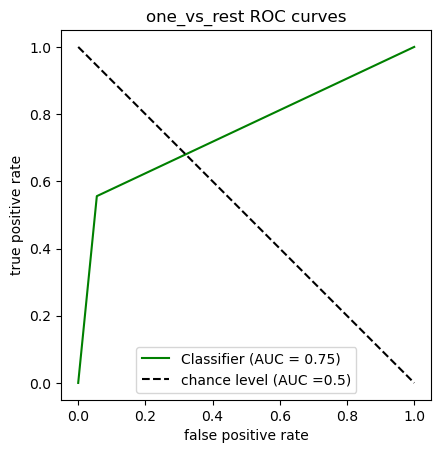

In [162]:
#plotting AUC curve
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
y_true = y_test, y_pred = y_pred_test,

color = 'green',)

plt.plot([0,1],[1,0], "k--", label = "chance level (AUC =0.5)")
plt.axis("square")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("one_vs_rest ROC curves")
plt.legend()
plt.show()

In [163]:
y_test.value_counts(normalize = True)

0    0.803866
1    0.196134
Name: Target, dtype: float64

## using decision tree classifier for making a predictive system

In [174]:
input_data= (5000,36,12.235,166.91,115000.0,2013,17.38,1989,18.0,0,11189.0,50.0,5.0,29597,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0)



#converting the input_data to numpy array

input_data_to_numpy_array= np.asarray(input_data)

#reshapening the array

input_data_reshaped = input_data_to_numpy_array.reshape(1, -1)

#standardise the input_data


std_data = scaler.transform(input_data_reshaped)

print(std_data)


input_data_df = pd.DataFrame(std_data)

prediction = class_tree.predict(input_data_df)
print(prediction)

[[-1.09051314e+00 -5.57974825e-01 -3.14032289e-01 -1.05668396e+00
   6.61882710e-01 -4.24555296e-01  2.69909632e-05 -1.23050882e+00
   1.30192925e+00 -4.13212116e-01 -2.26086965e-01  2.06825157e+00
   1.55957924e+00 -1.71892381e-01  1.55355143e+00 -6.04498330e-01
  -4.37088294e-01 -2.93899436e-01 -1.75030474e-01 -8.81559241e-02
  -1.92040334e-02 -3.24580004e-01  1.21591137e+00  1.41925017e+00
  -7.37682367e-01  1.94173988e+00 -1.20492695e+00 -2.54825849e-02
  -2.54158955e-01 -7.47577419e-02 -1.50662209e-01 -1.03482445e-01
  -8.51988013e-02 -2.37732399e-01 -2.88346295e-02 -1.20853745e-01
  -7.89304949e-02 -6.77970616e-02  1.22763603e+00 -4.24092856e-02]]
[0]


In [173]:
if (prediction[0] == 0):
    print("Non_defaulter")
else:
    print ("defaulter")

Non_defaulter


In [170]:
input_data= (25000,36,6.62,767.60,180000.0,2013,9.71,1995,7.0,0,11148.0,32.0,2.0,70466,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0)


#converting the input_data to numpy array

input_data_to_numpy_array= np.asarray(input_data)

#reshapening the array

input_data_reshaped = input_data_to_numpy_array.reshape(1, -1)

#standardise the input_data


std_data = scaler.transform(input_data_reshaped)

print(std_data)


input_data_df = pd.DataFrame(std_data)

prediction = class_tree.predict(input_data_df)
print(prediction)


[[ 1.3025668  -0.55797482 -1.56958003  1.33910456  1.7164348  -0.4245553
  -0.42563317 -0.39698769 -0.83913066 -0.41321212 -0.22807805  0.5539892
   0.09105312  1.42418923 -0.64368645 -0.60449833 -0.43708829 -0.29389944
  -0.17503047 -0.08815592 -0.01920403 -0.32458    -0.82242837  1.41925017
   1.355597   -0.51500204 -1.20492695 -0.02548258 -0.25415895 -0.07475774
  -0.15066221 -0.10348244 -0.0851988  -0.2377324  -0.02883463 -0.12085374
  -0.07893049 -0.06779706  1.22763603 -0.04240929]]
[0]


In [171]:
if (prediction[0] == 0):
    print("Non_defaulter")
else:
    print ("defaulter")

Non_defaulter
